In [56]:
# import the modules
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
#Load the dataset
#Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

# Code starts here
train = pd.read_csv("C:/Users/hp/Python Projects/Projects/Project_Decision_Trees_Loan_Defaulters/train.csv")
train.head()

,Id,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,6269,LA006270,Yes,debt_consolidation,12.53%,689.41,11.513725,14.45,722,4291.000000,13171,51.8,0,Less than 5,No,Yes
1,1460,LA001461,Yes,credit_card,10.20%,485.42,10.315597,12.87,752,5789.958333,14857,31.3,0,Less than 5,Yes,Yes
2,5539,LA005540,Yes,debt_consolidation,12.87%,121.08,11.238436,1.58,692,3391.000000,12135,85.5,0,Less than 5,No,Yes
3,9020,LA009021,No,all_other,15.37%,348.47,11.142007,11.01,687,5370.000000,10631,35.3,0,Less than 10,No,Yes
4,4365,LA004366,Yes,debt_consolidation,14.61%,344.76,10.308953,11.36,672,2429.958333,10544,57.0,0,Less than 5,Yes,Yes


In [58]:
# drop serial number
train.drop(columns=['Id','customer.id'],inplace=True)
train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,Yes,debt_consolidation,12.53%,689.41,11.513725,14.45,722,4291.000000,13171,51.8,0,Less than 5,No,Yes
1,Yes,credit_card,10.20%,485.42,10.315597,12.87,752,5789.958333,14857,31.3,0,Less than 5,Yes,Yes
2,Yes,debt_consolidation,12.87%,121.08,11.238436,1.58,692,3391.000000,12135,85.5,0,Less than 5,No,Yes
3,No,all_other,15.37%,348.47,11.142007,11.01,687,5370.000000,10631,35.3,0,Less than 10,No,Yes
4,Yes,debt_consolidation,14.61%,344.76,10.308953,11.36,672,2429.958333,10544,57.0,0,Less than 5,Yes,Yes


In [59]:
#Visualize the data
#Check for the categorical & continuous features.
#Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots
#Clean the data, apply some data preprocessing and engineering techniques.

# Check the distribution of the target variable

#Storing value counts of target variable in 'fully_paid'
fully_paid = train['paid.back.loan'].value_counts()
fully_paid

Yes    6444
No     1218
Name: paid.back.loan, dtype: int64

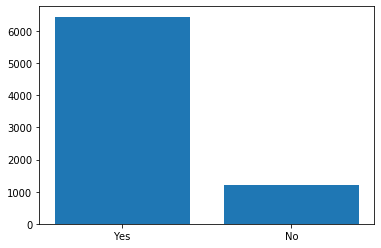

In [60]:
#Plotting bar plot
plt.bar(fully_paid.index, fully_paid)
plt.show()

In [61]:
# From the column int.rate of 'train', remove the % character and convert the column into float.
# After that divide the values of 'int.rate' with 100 and store the result back to the column 'int.rate'

#Removing the last character from the values in column
train['int.rate'] = train['int.rate'].map(lambda x: str(x)[:-1])
train['int.rate'].head()


0    12.53
1    10.20
2    12.87
3    15.37
4    14.61
Name: int.rate, dtype: object

In [62]:
#Dividing the column values by 100
train['int.rate'] = train['int.rate'].astype(float)/100
train['int.rate'].head()

0    0.1253
1    0.1020
2    0.1287
3    0.1537
4    0.1461
Name: int.rate, dtype: float64

In [63]:
#Storing all the numerical type columns in 'num_df'
num_df = train.select_dtypes(include=['number']).copy()
print(num_df.head())

#Storing all the categorical type columns in 'cat_df'
cat_df = train.select_dtypes(include=['object']).copy()
print(cat_df.head())

   int.rate  installment  log.annual.inc    dti  fico  days.with.cr.line  \
0    0.1253       689.41       11.513725  14.45   722        4291.000000   
1    0.1020       485.42       10.315597  12.87   752        5789.958333   
2    0.1287       121.08       11.238436   1.58   692        3391.000000   
3    0.1537       348.47       11.142007  11.01   687        5370.000000   
4    0.1461       344.76       10.308953  11.36   672        2429.958333   

   revol.bal  revol.util  pub.rec  
0      13171        51.8        0  
1      14857        31.3        0  
2      12135        85.5        0  
3      10631        35.3        0  
4      10544        57.0        0  
  credit.policy             purpose inq.last.6mths delinq.2yrs paid.back.loan
0           Yes  debt_consolidation    Less than 5          No            Yes
1           Yes         credit_card    Less than 5         Yes            Yes
2           Yes  debt_consolidation    Less than 5          No            Yes
3            No

['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec']


<Figure size 1440x1440 with 0 Axes>

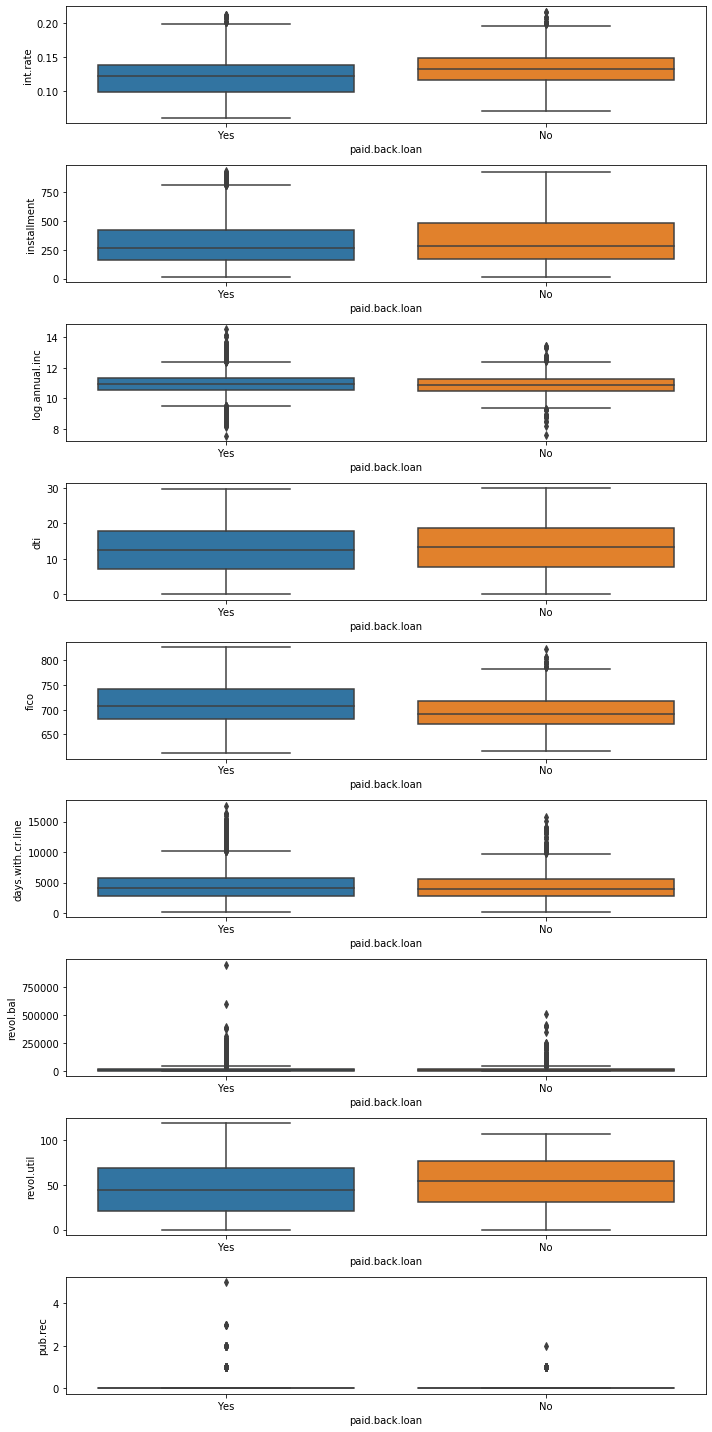

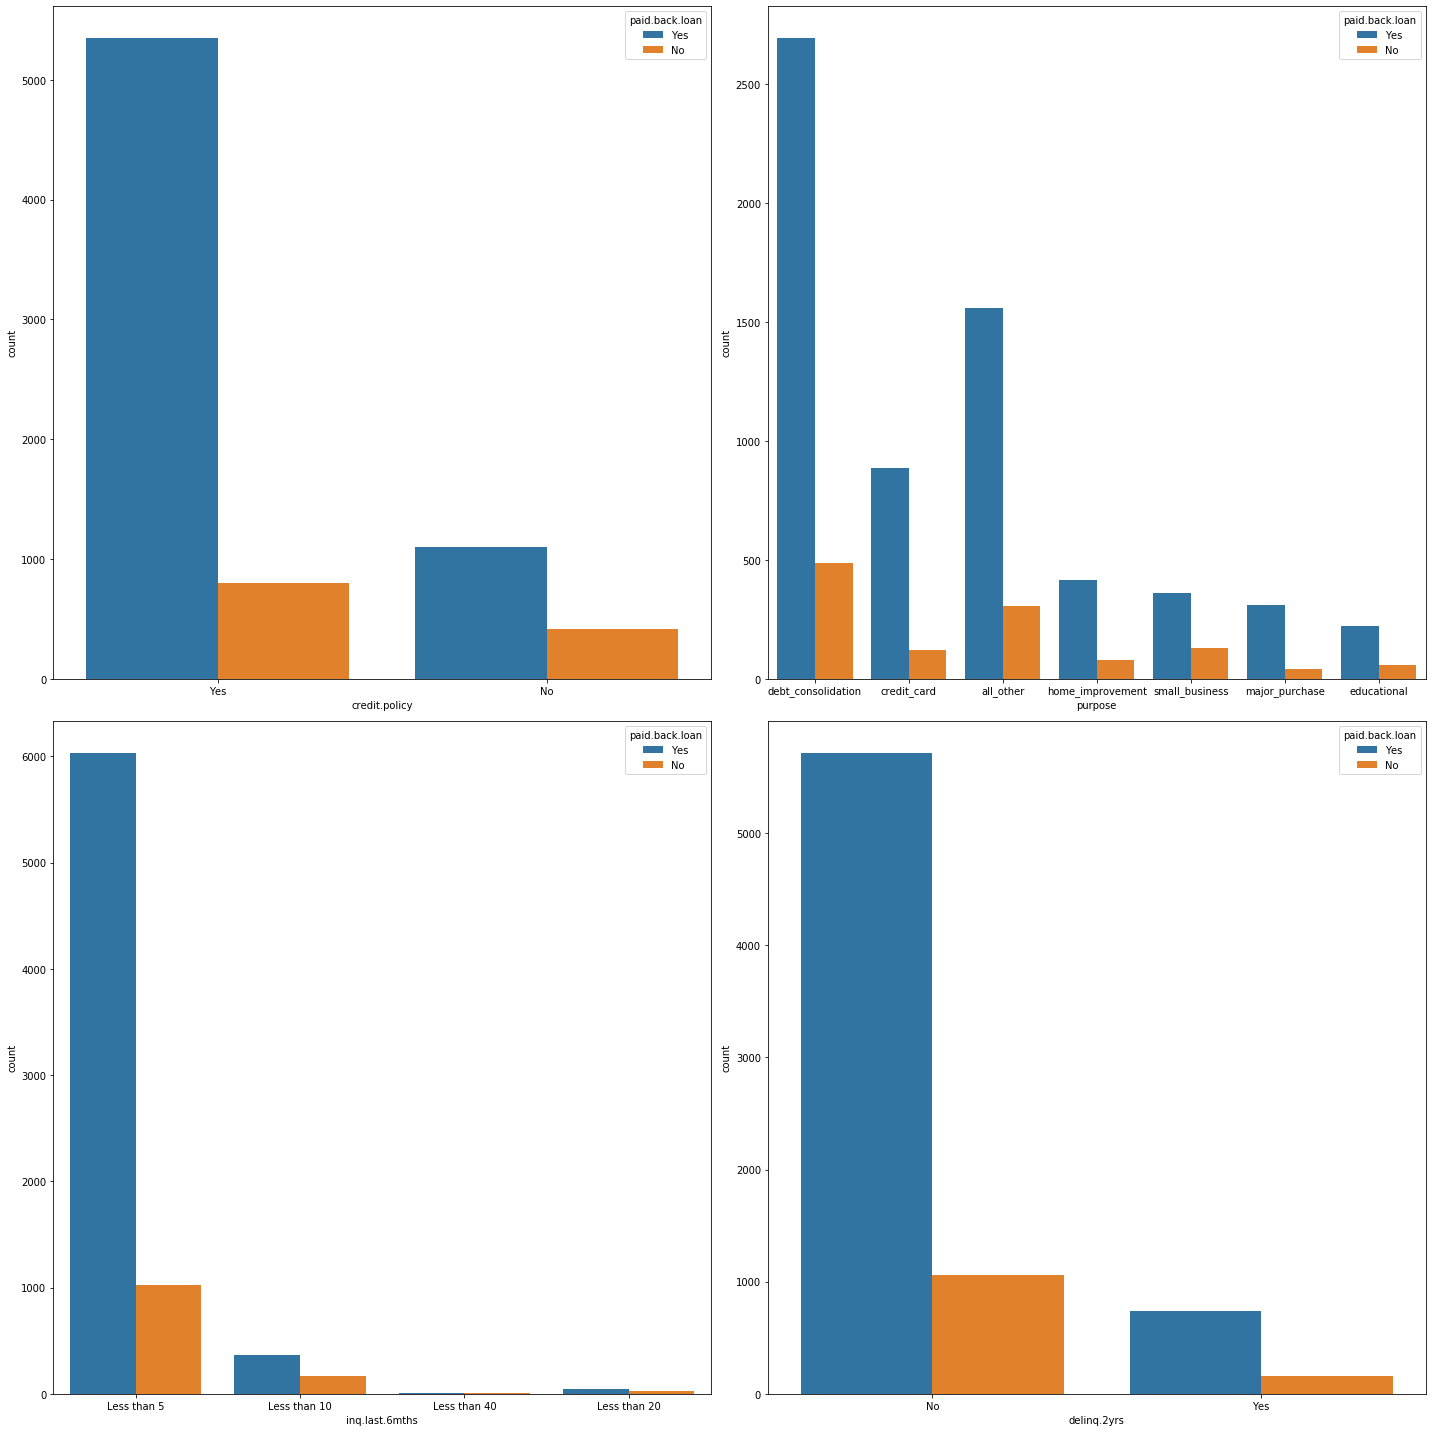

In [64]:
plt.figure(figsize=(20,20))


#Storing the columns of 'num_df'
cols=list(num_df.columns)
print(cols)

#Creating subplots
fig,axes=plt.subplots(9,1, figsize=(10,20))

#Looping across rows
for i in range(9):          
    
    #Plotting boxplot
    sns.boxplot(x=train['paid.back.loan'],y=num_df[cols[i]],ax=axes[i])
    
    #Avoiding subplots overlapping
    fig.tight_layout()    

# Visualizing Categorical Features
#Storing the columns of 'cat_df'
cols=list(cat_df.columns)

#Setting up subplots
fig,axes=plt.subplots(2,2, figsize=(20,20))

#Looping through rows
for i in range(0,2):
    
    #Looping through columns
    for j in range(0,2):
        
        #Plotting count plot
        sns.countplot(x=train[cols[i*2+j]], hue=train['paid.back.loan'],ax=axes[i,j])                        
        
        #Avoiding subplots overlapping
        fig.tight_layout()    

In [66]:
#Model building
#Separate the features and target.
#Now let's come to the actual task, using Decision Tree, predict the paid.back.loan. Use different techniques you have learned to imporove the performance of the model
#Try improving upon the accuracy_score (Accuracy Score)

# Split the data into train and test
X = train.drop(columns = ['paid.back.loan'])
y = train[['paid.back.loan']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initializing a list of categorical columns & dropping the target column from the list
cat_cols = list(cat_df.columns)
cat_df = cat_cols.remove('paid.back.loan')

#Looping through categorical columns
for col in cat_cols:
    
    #Filling null values with 'NA'
    X_train[col].fillna('NA',inplace=True)
    
    #Initalising a label encoder object
    le=LabelEncoder()
    
    #Fitting and transforming the column in X_train with 'le'
    X_train[col]=le.fit_transform(X_train[col]) 
    
    #Filling null values with 'NA'
    X_test[col].fillna('NA',inplace=True)
    
    #Fitting the column in X_test with 'le'
    X_test[col]=le.transform(X_test[col]) 

# Replacing the values of y_train
y_train.replace({'No':0,'Yes':1},inplace=True)

# Replacing the values of y_test
y_test.replace({'No':0,'Yes':1},inplace=True)

#Initialising 'Decision Tree' model    
model=DecisionTreeClassifier(random_state=0)

#Training the 'Decision Tree' model
model.fit(X_train, y_train)

#Finding the accuracy of 'Decision Tree' model
acc=model.score(X_test, y_test)

#Printing the accuracy
print("Accuracy: ", acc)


# Code ends here

Accuracy:  0.7324923879947803


In [67]:
# Let's see if pruning of decision tree improves its accuracy. We will use grid search to do the optimum pruning.

#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

#Code starts here

#Initialising 'Decision Tree' model
model_2 = DecisionTreeClassifier(random_state=0)

#Applying Grid Search of hyper-parameters and finding the optimum 'Decision Tree' model
p_tree = GridSearchCV(model_2, parameter_grid, cv=5)

#Training the optimum 'Decision Tree' model
p_tree.fit(X_train, y_train)

#Finding the accuracy of the optimum 'Decision Tree' model
acc_2 = p_tree.score(X_test, y_test)

#Printing the accuracy
print("Accuracy: ", acc_2)

Accuracy:  0.8316659417137886


In [68]:
#Prediction on the test data and creating the sample submission file.¶
#Load the test data and store the Id column in a separate variable.
#Perform the same operations on the test data that you have performed on the train data.
#Create the submission file as a csv file consisting of the Id column from the test data and your prediction as the second column.

# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv('C:/Users/hp/Python Projects/Projects/Project_Decision_Trees_Loan_Defaulters/test.csv')

# Storing the id from the test file
id_ = test['Id']

# Apply the transformations on test
test.drop(columns=['Id', 'customer.id'],inplace=True)
#Removing the last character from the values in column
test['int.rate'] = test['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
test['int.rate']=test['int.rate'].astype(float)/100

for col in cat_cols:
    
    #Filling null values with 'NA'
    test[col].fillna('NA',inplace=True)
    
    #Initalising a label encoder object
    le=LabelEncoder()
    
    #Fitting and transforming the column in test with 'le'
    le.fit(train[col])
    test[col]=le.transform(test[col]) 
    
    
    
# Predict on the test data
y_pred_test = p_tree.predict(test)
y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'paid.back.loan':y_pred_test})
print(sample_submission.head())

# Replacing the values of sample_submission
sample_submission.replace({1:'Yes', 0: 'No'},inplace=True)

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission_test1.csv',index=False)

# Code ends here


     Id  paid.back.loan
0  5468               1
1  7530               1
2   501               1
3  2690               1
4  3691               1
